# Credit Risk

pada notebook kali ini akan dilakukan permodelan pada dataset untuk mengetahui label nasabah. Apakah nasabah tersebut gagal bayar(tidak bisa melunasi pinjaman) atau tidak dengan menggunakan machine learning dalam melakukan prediksi tersebut

In [ ]:
#import library pada data set
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# setting untuk visualisasi
from matplotlib import rcParams

rcParams['figure.figsize'] = (12, 4)
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'small'
rcParams['ytick.labelsize'] = 'small'

# About Dataset

In [3]:
# load data set

data = pd.read_csv('loan_data_2007_2014.csv', low_memory=False)
data.drop("Unnamed: 0", axis=1, inplace=True)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

terlihat pada data set memiliki missing values yang cukup banyak dan beberapa kolom yang tidak perlu pada target maka dari itu akan dilakukan drop data yang tidak perlu dan menghilangkan kolom yang memiliki missing values banyak

In [4]:
# melakukan drop pada kolom Id, member_id
data.drop(['id','member_id'], axis=1, inplace=True)

In [5]:
# melakukan drop pada data yang kosong
data = data.dropna(axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   loan_amnt                466285 non-null  int64  
 1   funded_amnt              466285 non-null  int64  
 2   funded_amnt_inv          466285 non-null  float64
 3   term                     466285 non-null  object 
 4   int_rate                 466285 non-null  float64
 5   installment              466285 non-null  float64
 6   grade                    466285 non-null  object 
 7   sub_grade                466285 non-null  object 
 8   home_ownership           466285 non-null  object 
 9   verification_status      466285 non-null  object 
 10  issue_d                  466285 non-null  object 
 11  loan_status              466285 non-null  object 
 12  pymnt_plan               466285 non-null  object 
 13  url                      466285 non-null  object 
 14  purp

sudah tidak ada missing values pada dataset kita dan terlihat dataset ini memiliki 18 kolom numerikal dan 14 kolom object pada tahap ini akan dilakukan pemisahan pada kolom numerikal dan catagorikal untuk memudahkan dalam melakukan EDA pada data set

 # Exploratory Data Analyis
 
 pada tahap ini akan dilakukan EDA untuk mengetahui seperti apa data set yang akan digunakan sebelum pada tahap modeling

In [7]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,verification_status,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,RENT,Verified,...,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,1,INDIVIDUAL
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,RENT,Source Verified,...,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,1,INDIVIDUAL
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,RENT,Not Verified,...,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,1,INDIVIDUAL
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,RENT,Source Verified,...,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,1,INDIVIDUAL
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,RENT,Source Verified,...,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,1,INDIVIDUAL


In [8]:
#memisahkan kolom-kolom kategori dan numerikal
num = []
cat = []

for i in range(len(data.columns)):
    if data.dtypes[i] == 'object':
        cat.append(data.columns[i])
    else :
        num.append(data.columns[i])

In [9]:
data[num].describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,dti,revol_bal,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code
count,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.0
mean,14317.277577,14291.801044,14222.329888,13.829236,432.061201,17.218758,1.623020e+04,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,1.0
std,8286.509164,8274.371300,8297.637788,4.357587,243.485550,7.851121,2.067625e+04,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.0
min,500.000000,500.000000,0.000000,5.420000,15.670000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,8000.000000,8000.000000,8000.000000,10.990000,256.690000,11.360000,6.413000e+03,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,1.0
50%,12000.000000,12000.000000,12000.000000,13.660000,379.890000,16.870000,1.176400e+04,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,1.0
75%,20000.000000,20000.000000,19950.000000,16.490000,566.580000,22.780000,2.033300e+04,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,1.0
max,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,39.990000,2.568995e+06,32160.380000,32160.380000,57777.579870,57777.580000,35000.030000,24205.620000,358.680000,33520.270000,7002.190000,36234.440000,1.0


In [10]:
data[cat].describe()

,term,grade,sub_grade,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,initial_list_status,application_type
count,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285
unique,2,7,35,6,3,91,9,2,466285,14,888,50,2,1
top,36 months,B,B3,MORTGAGE,Verified,Oct-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,945xx,CA,f,INDIVIDUAL
freq,337953,136929,31686,235875,168055,38782,224226,466276,1,274195,5304,71450,303005,466285


In [11]:
data['loan_status']

0          Fully Paid
1         Charged Off
2          Fully Paid
3          Fully Paid
4             Current
             ...     
466280        Current
466281    Charged Off
466282        Current
466283     Fully Paid
466284        Current
Name: loan_status, Length: 466285, dtype: object

In [12]:
# showing the precise value counts
# this code is especially useful if we have many categorical columns
for col in cat:
  print(f"Value counts of {col} column")
  print(data[col].value_counts(), '\n')

Value counts of term column
 36 months    337953
 60 months    128332
Name: term, dtype: int64 

Value counts of grade column
B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: grade, dtype: int64 

Value counts of sub_grade column
B3    31686
B4    30505
C1    26953
C2    26740
B2    26610
C3    25317
B5    25252
C4    24105
B1    22876
C5    22178
A5    21757
D1    19261
A4    19045
D2    17046
D3    14916
D4    14099
A3    12568
D5    11566
A2    10956
A1    10541
E1     9033
E2     8669
E3     6976
E4     5992
E5     5087
F1     3940
F2     3001
F3     2708
F4     2067
F5     1513
G1     1109
G2      823
G3      583
G4      422
G5      385
Name: sub_grade, dtype: int64 

Value counts of home_ownership column
MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          182
NONE            50
ANY              1
Name: home_ownership, dtype: int64 

Value counts of verification_status column
Verified           168055
Source Verified    

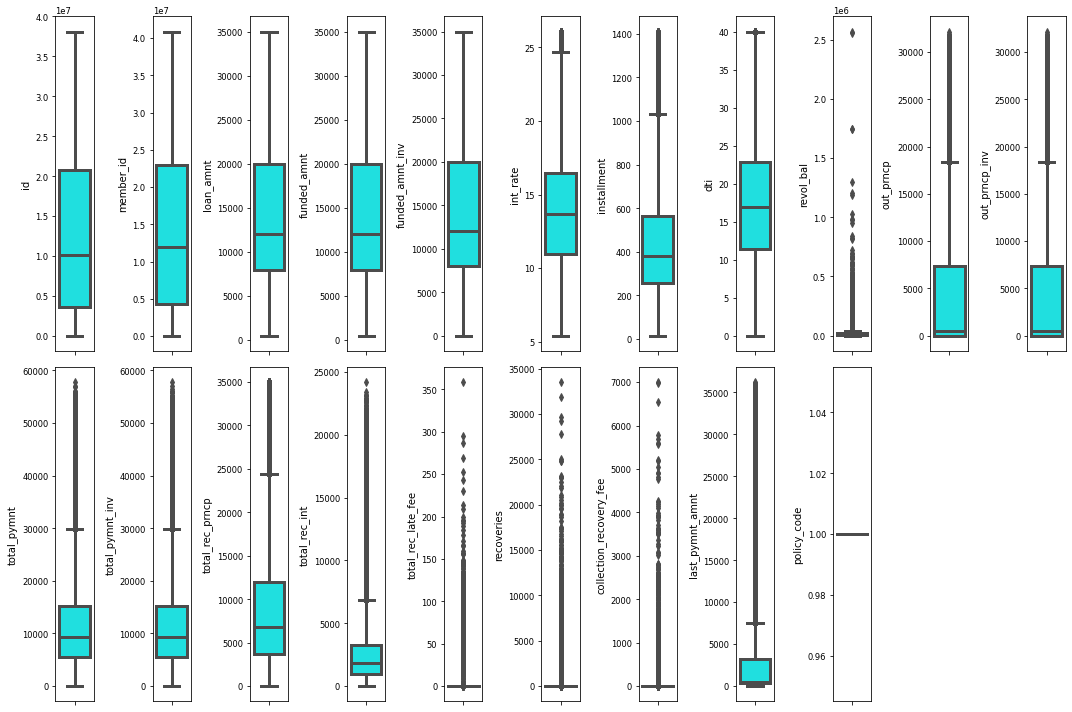

In [97]:
fig, ax = plt.subplots(figsize=(15,10))
# plotting
features = num
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.boxplot(y=data[features[i]], color='cyan')
    plt.tight_layout()

In [101]:
data['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

pada tahap ini akan dilakukan penargetan data pada kolom loan status dimana data nilai atribut yang akan digunakan pada data adalah fully paid dan charged off untuk melakukan permodelan kategori dan mengahapus kolom yang tidak digunakan pada target diantaranya

`policy_code` `addr_state` `application_type` `url` `grade` `issue_d`

In [13]:
# melakukan pemilihan data dengan atribut fully paid dan charged off pada kolom loan status

data = data[(data['loan_status']=='Fully Paid') | (data['loan_status'] == 'Charged Off')]


# Drop kolom yang tidak perlu
drop_col = ['policy_code','addr_state','application_type','url' ,'grade','issue_d','out_prncp','out_prncp_inv']

data.drop(drop_col, axis=1, inplace=True)

# melihat data kembali
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,home_ownership,verification_status,loan_status,...,revol_bal,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
0,5000,5000,4975.0,36 months,10.65,162.87,B2,RENT,Verified,Fully Paid,...,13648,f,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62
1,2500,2500,2500.0,60 months,15.27,59.83,C4,RENT,Source Verified,Charged Off,...,1687,f,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66
2,2400,2400,2400.0,36 months,15.96,84.33,C5,RENT,Not Verified,Fully Paid,...,2956,f,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91
3,10000,10000,10000.0,36 months,13.49,339.31,C1,RENT,Source Verified,Fully Paid,...,5598,f,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48
5,5000,5000,5000.0,36 months,7.90,156.46,A4,RENT,Source Verified,Fully Paid,...,7963,f,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,161.03


<AxesSubplot:xlabel='count', ylabel='loan_status'>

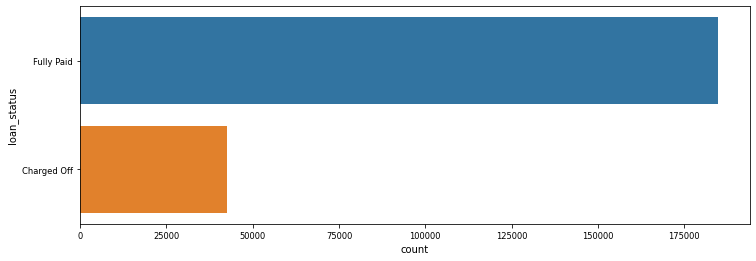

In [14]:
# melihat komposisi pada data target
sns.countplot(y=data['loan_status'])

In [8]:
#memisahkan kolom-kolom kategori dan numerikal
# untuk melihat kembali distribusi data setelah dilakukan pengambilan data
num = []
cat = []

for i in range(len(data.columns)):
    if data.dtypes[i] == 'object':
        cat.append(data.columns[i])
    else :
        num.append(data.columns[i])

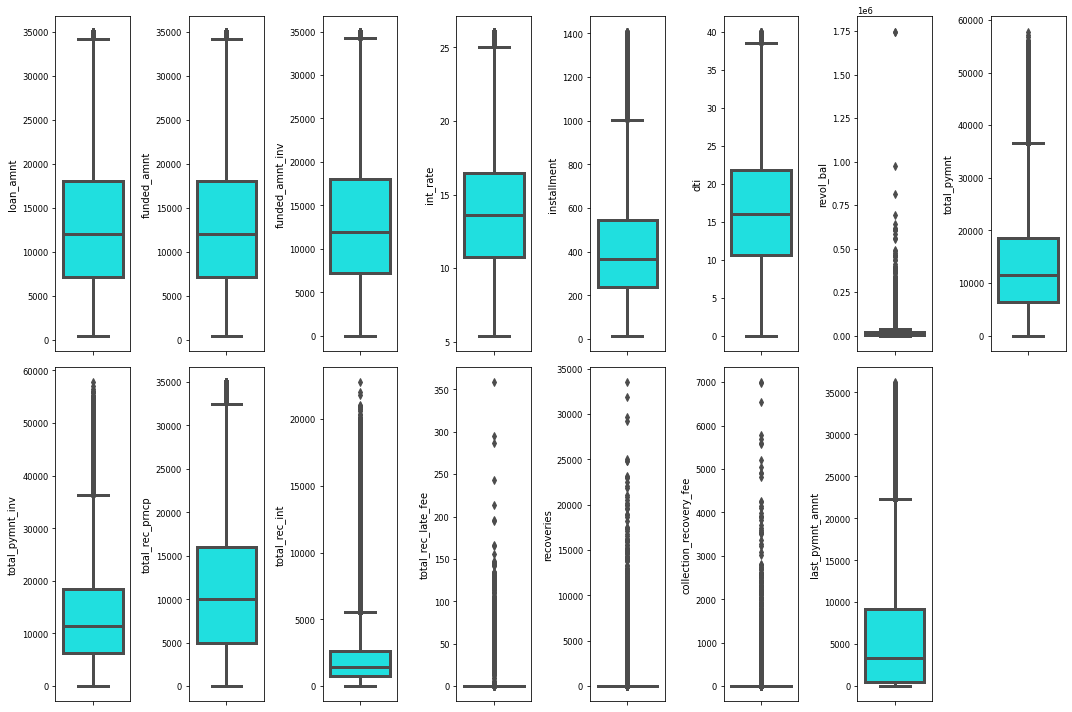

In [9]:
fig, ax = plt.subplots(figsize=(15,10))
# plotting
features = num
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.boxplot(y=data[features[i]], color='cyan')
    plt.tight_layout()

In [33]:
data.shape

(227214, 43)

terlihat dataset kita memiliki 227214 baris dan 43 kolom maka
setelah melakukan filter data yang akan digunakan dan menentukan kolom-kolom yang akan digunakan dataset akan dilakukan feature enginering agar data bisa dilakukan permodelan

# Feature Enginering

In [ ]:
# membuat data target dengan kolom loan status
loan_dict = {
    'Fully Paid' : 1,
    'Charged Off' : 0
}

data['y'] = data['loan_status'].map(loan_dict)

In [16]:
# melakukan feature label encoding pada kolom trem
term_dict = {
    ' 36 months' : 36,
    ' 60 months' : 60
}

data['term'] = data['term'].map(term_dict)

In [17]:
#mengambil 3 angka pada kolom string
data['zip_code'] = data['zip_code'].apply(lambda x: x[0:3])

#mengubah type data string menjadi numerikal
data['zip_code'] = data['zip_code'].astype(int)
data['zip_code'].head()

0    860
1    309
2    606
3    917
5    852
Name: zip_code, dtype: int32

In [18]:
# karena sudah ada membuat kolom target /y maka kolom loan_status di drop
data.drop("loan_status", axis=1, inplace=True)

melakukan one hot encoding pada kolom
`initial_list_status`
`purpose`
`home_ownership`

label encoding pada kolom

`installment`
`sub_grade`
`verification_status`
`pymnt_plan`


In [19]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data['installment'] = encoder.fit_transform(data['installment'])
data['sub_grade'] = encoder.fit_transform(data['sub_grade'])
data['pymnt_plan'] = encoder.fit_transform(data['pymnt_plan'])
data['verification_status'] = encoder.fit_transform(data['verification_status'])

### Onehot Encoding
onehot_columns = ['initial_list_status', 'purpose','home_ownership']
data = pd.get_dummies(data, columns = onehot_columns)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227214 entries, 0 to 466283
Data columns (total 43 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   227214 non-null  int64  
 1   funded_amnt                 227214 non-null  int64  
 2   funded_amnt_inv             227214 non-null  float64
 3   term                        227214 non-null  int64  
 4   int_rate                    227214 non-null  float64
 5   installment                 227214 non-null  int64  
 6   sub_grade                   227214 non-null  int32  
 7   verification_status         227214 non-null  int32  
 8   pymnt_plan                  227214 non-null  int32  
 9   zip_code                    227214 non-null  int32  
 10  dti                         227214 non-null  float64
 11  revol_bal                   227214 non-null  int64  
 12  total_pymnt                 227214 non-null  float64
 13  total_pymnt_in

# melakukan pemisahan data test dan traning data

pada tahap ini akan dilakukan split data traning dan test data dengan rasio 75(data traning) : 25(data test)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
df_train, df_test = train_test_split(data, 
                                     test_size = 0.25, random_state = 1) 

In [22]:
x_train_data = df_train.loc[:, df_train.columns!='y']
y_train_data = df_train.loc[:, df_train.columns=='y']

x_test_data = df_test.loc[:, df_test.columns!='y']
y_test_data = df_test.loc[:, df_test.columns=='y']

# Permodelan

pada tahap ini akan dilakukan permodelan pada dataset
permodelan yang akan digunakan diantaranya
1. Random Forest
2. KNN
3. logistic regression
4. Dicision tree

pada perbandinga setiap ML akan digunakan matrik pada evaluasi model dengan mencari nilai recall terbaik pada permodelan kali ini

## Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [24]:
def evaluate(model, x_test = x_test_data, y_test = y_test_data):
    y_pred = model.predict(x_test)    
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_test, y_pred))
    print('------')
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)
    
    print('')
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-Score:', 2 * (precision * recall)/(precision + recall))
    

In [25]:
base_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
base_model.fit(x_train_data, y_train_data)
evaluate(base_model)

C:\Users\zarkasih\AppData\Local\Temp\ipykernel_15252\3707982330.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  base_model.fit(x_train_data, y_train_data)


Accuracy: 0.9980987254418703
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     10698
           1       1.00      1.00      1.00     46106

    accuracy                           1.00     56804
   macro avg       1.00      0.99      1.00     56804
weighted avg       1.00      1.00      1.00     56804

------
Assuming 1 as positive, we get:

True Positive: 46105
True Negative: 10591
False Positive: 107
False Negative: 1

Precision: 0.9976845840907124
Recall: 0.9999783108489134
F1-Score: 0.9988301306354125


## KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train_data, y_train_data)
evaluate(knn)

C:\Users\zarkasih\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.9948243081473136
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     10698
           1       0.99      1.00      1.00     46106

    accuracy                           0.99     56804
   macro avg       1.00      0.99      0.99     56804
weighted avg       0.99      0.99      0.99     56804

------
Assuming 1 as positive, we get:

True Positive: 46080
True Negative: 10430
False Positive: 268
False Negative: 26

Precision: 0.9942176577198585
Recall: 0.9994360820717477
F1-Score: 0.9968200402362255


 ## logistic regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
logreg = LogisticRegression()
logreg.fit(x_train_data, y_train_data)
evaluate(logreg)

C:\Users\zarkasih\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\zarkasih\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9965495387648757
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     10698
           1       1.00      1.00      1.00     46106

    accuracy                           1.00     56804
   macro avg       1.00      0.99      0.99     56804
weighted avg       1.00      1.00      1.00     56804

------
Assuming 1 as positive, we get:

True Positive: 46087
True Negative: 10521
False Positive: 177
False Negative: 19

Precision: 0.9961741310738371
Recall: 0.9995879061293541
F1-Score: 0.9978780989498756


## Decision tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dt = DecisionTreeClassifier()
dt.fit(x_train_data, y_train_data)
evaluate(dt)

Accuracy: 0.9983803957467784
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10698
           1       1.00      1.00      1.00     46106

    accuracy                           1.00     56804
   macro avg       1.00      1.00      1.00     56804
weighted avg       1.00      1.00      1.00     56804

------
Assuming 1 as positive, we get:

True Positive: 46063
True Negative: 10649
False Positive: 49
False Negative: 43

Precision: 0.9989373698820264
Recall: 0.9990673665032751
F1-Score: 0.9990023639636514


1. random forest
> 1. Accuracy: 0.9980987254418703
> 2. Precision: 0.9976845840907124
> 3. Recall: 0.9999783108489134
> 4. F1-Score: 0.9988301306354125

2. knn
> 1. Accuracy:0.9948243081473136
> 2. Precision: 0.9942176577198585
> 3. Recall: 0.9994360820717477
> 4. F1-Score: 0.9968200402362255


3. logistic regression
> 1. Accuracy: 0.9965495387648757
> 2. Precision: 0.9961741310738371
> 3. Recall: 0.9995879061293541
> 4. F1-Score: 0.9978780989498756

4. decision tree
> 1. Accuracy: 0.9983803957467784
> 2. Precision: 0.9989373698820264
> 3. Recall: 0.9990673665032751
> 4. F1-Score: 0.9990023639636514

terlihat pada perbandingan dari setiap model yang diperlajari dapat disimpulkan pada model ML random forest memiliki nilai recall tertinggi dengan nilai 0.999978 lebih tinggi daripada model ML yang lain dengan demikian pada kali ini akan digunakan ML random forest untuk melakukan prediksi

## conclusion

evaluasi machine learning pada random forest memiliki nilai recall tertinggi maka pada prediksi kali ini hingga 99.8 persen akurasi yang di dapatkan dan memungkinakan bahwa pada data set bisa melakukan prediksi dengan data tersebut apakah orang yang meminjam akan gagal bayar atau tidak